### DECISION TREE CLASSIFICATION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Reading the Datasets

In [2]:
data = pd.read_csv('Datasets/employee.csv')
data1=data

### Checking the Duplicates

In [3]:
data.duplicated().sum()

3008

### Removing the Duplicates

In [4]:
data = data.drop_duplicates()


### Reseting the Axis 

In [5]:
# Reset the index without modifying the original data reference
data = data.reset_index(drop=True)



### Checking for NULL Values

In [6]:
data.isna().sum()
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64

### Converting the Categorical Values into Numerical Values using Label Encoding

In [7]:
departments = LabelEncoder()

data['department'] = departments.fit_transform(data['department'])
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,7,low,1
1,0.80,0.86,5,262,6,0,0,7,medium,1
2,0.11,0.88,7,272,4,0,0,7,medium,1
3,0.72,0.87,5,223,5,0,0,7,low,1
4,0.37,0.52,2,159,3,0,0,7,low,1
...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,1,4,high,0
11987,0.74,0.95,5,266,10,0,1,4,high,0
11988,0.85,0.54,3,185,10,0,1,4,high,0
11989,0.33,0.65,3,172,10,0,1,5,high,0


In [8]:
salarys = LabelEncoder()

data['salary'] = salarys.fit_transform(data['salary'])
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,7,1,1
1,0.80,0.86,5,262,6,0,0,7,2,1
2,0.11,0.88,7,272,4,0,0,7,2,1
3,0.72,0.87,5,223,5,0,0,7,1,1
4,0.37,0.52,2,159,3,0,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,1,4,0,0
11987,0.74,0.95,5,266,10,0,1,4,0,0
11988,0.85,0.54,3,185,10,0,1,4,0,0
11989,0.33,0.65,3,172,10,0,1,5,0,0


In [9]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary', 'left'],
      dtype='object')

### Checking Outliers for Nomial Data

In [10]:
column_names = ['satisfaction_level', 'last_evaluation', 'number_project',
                'average_montly_hours', 'time_spend_company', 'Work_accident',
                'promotion_last_5years', 'left']



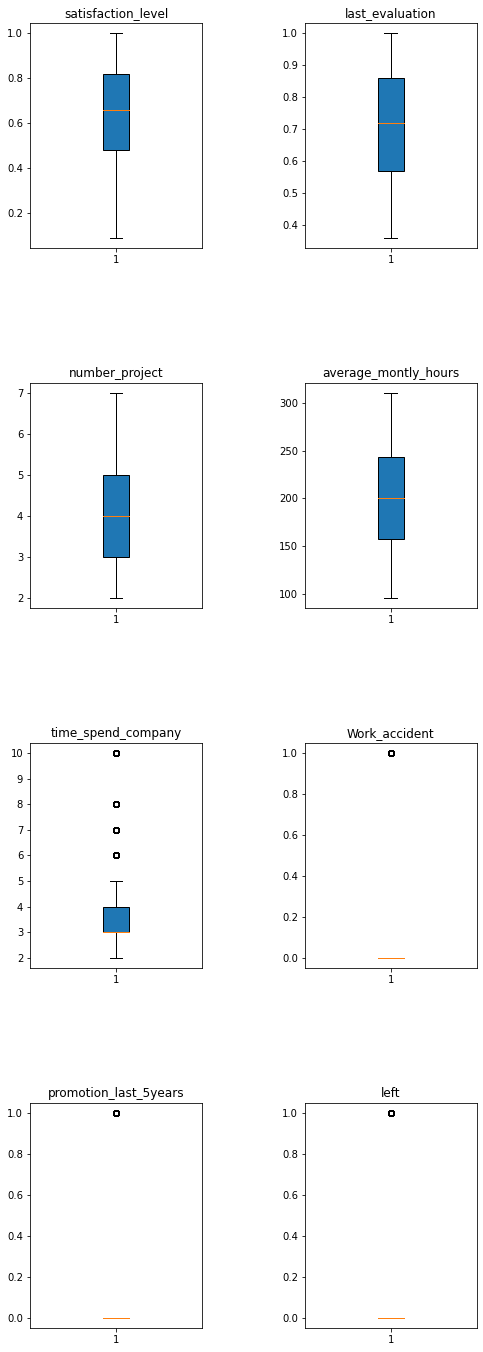

In [11]:
plt.figure(figsize=(8, len(column_names) * 3))
plt.subplots_adjust(wspace=0.6, hspace=0.6)
i=1

for col in column_names:
    plt.subplot(4, 2, i)
    plt.boxplot(data[col], patch_artist=True)
    plt.title(col)
    i += 1

plt.show()


### Removing outliers for Nomial Data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,7,1,1
1,0.11,0.88,7,272,4,0,0,7,2,1
2,0.72,0.87,5,223,5,0,0,7,1,1
3,0.37,0.52,2,159,3,0,0,7,1,1
4,0.41,0.50,2,153,3,0,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...
11162,0.72,0.64,4,192,3,0,0,7,2,0
11163,0.48,0.50,5,142,4,0,0,0,2,0
11164,0.19,0.79,4,229,4,0,0,6,2,0
11165,0.62,0.85,3,237,3,1,0,0,2,0


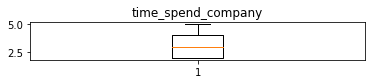

In [12]:
outlier_columns = ['time_spend_company']

i=1

for col in outlier_columns:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    
    IQR=Q3-Q1
    
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    upper_index=np.where(data[col] >= upper)[0]
    lower_index=np.where(data[col] <= lower)[0]
    
    data.drop(index= upper_index , inplace = True)
    data.drop(index= lower_index , inplace = True)
    
    plt.subplots_adjust(wspace=0.6,hspace=0.6)
    plt.subplot(4,1,i)
    i=i+1
    plt.boxplot(data[col])
    plt.title(col)
    
    data.reset_index(inplace=True)
    data.drop('index',axis=1,inplace=True)
    
data

### Spliting into Independent Variable and Dependent Variable

In [13]:
x=data.drop('left', axis = 1)

In [14]:
y=data['left']

### Spliting the data into training and testing data

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

### Creating the model and training the model

In [16]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
model.get_depth()

22

### Training vs Testing Score

In [18]:
print("Train Score",model.score(x_train,y_train))
print("Test Score",model.score(x_test,y_test))



Train Score 1.0
Test Score 0.9702722063037249


### Prediction using X test

In [19]:
y_pred = model.predict(x_test)
pd.DataFrame({'True Value' : y_test ,'Predicted Value' : y_pred })

,True Value,Predicted Value
9816,0,0
8262,0,0
10990,0,0
5772,0,0
3293,0,0
...,...,...
10876,0,0
3962,0,0
5849,0,0
10443,0,0


### Accuracy Score

In [20]:
print(f'Accuracy Score,{accuracy_score(y_test,y_pred)}')

Accuracy Score,0.9702722063037249


### Calcuating the Error

In [21]:
print("mean_squared_error : " ,mean_squared_error(y_test,y_pred))
print("mean_absolute_error : ",mean_absolute_error(y_test,y_pred))

mean_squared_error :  0.02972779369627507
mean_absolute_error :  0.02972779369627507


### Confusion Matrix

In [22]:
cm =  confusion_matrix(y_test,y_pred)
cm

array([[2292,   46],
       [  37,  417]], dtype=int64)

### Classification Report

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2338
           1       0.90      0.92      0.91       454

    accuracy                           0.97      2792
   macro avg       0.94      0.95      0.95      2792
weighted avg       0.97      0.97      0.97      2792



### Custom Prediction

In [24]:
model.predict([[0.34,0.93,2,155,3,1,1,7,1]])

C:\Users\gkcha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [25]:
column_names = ['satisfaction_level', 'last_evaluation', 'number_project',
                'average_montly_hours', 'time_spend_company', 'Work_accident',
                'promotion_last_5years']

mini = [0.09,0.36,2,96,2,0,0]
maxi = [1.0,1.0,7,310,5,1,1]


In [26]:
satisatisfaction_level=float(input("Enter the satisfaction_level 0.09 b/w 1.0"))

last_evaluation=float(input("Enter the last_evaluation 0.36 b/w 1.0"))

number_project=int(input("Enter the number_project 2 b/w 7"))

average_montly_hours=int(input("Enter the average_montly_hours 96 b/w 310"))

time_spend_company=int(input("Enter the time_spend_company 2 b/w 5"))

Work_accident=int(input("Enter the Work_acciden 0 b/w 1"))

promotion_last_5years=int(input("Enter the promotion_last_5years 0 b/w 1"))

department =input(f"Enter the department {data1['department'].unique()}")
salary=input(f"Enter the salary {data1['salary'].unique()}")
     

Enter the satisfaction_level 0.09 b/w 1.01
Enter the last_evaluation 0.36 b/w 1.0.69
Enter the number_project 2 b/w 75
Enter the average_montly_hours 96 b/w 310269
Enter the time_spend_company 2 b/w 55
Enter the Work_acciden 0 b/w 11
Enter the promotion_last_5years 0 b/w 10
Enter the department ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']sales
Enter the salary ['low' 'medium' 'high']low


In [27]:
department=departments.transform([department])
salary=salarys.transform([salary])



In [28]:
model.predict([[satisatisfaction_level,last_evaluation,
number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary]])

C:\Users\gkcha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [29]:
salary

array([1])

### Checking No.of Yes vs No

In [32]:
from collections import Counter
Counter(y_train)

Counter({0: 6947, 1: 1428})

### SMOKE is used to Improve the dataset in such as way that 0:1 = 1:1

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
#pip install imblearn


### Sampling 1

In [35]:
smt = SMOTE()

x_train_smt , y_train_smt = smt.fit_resample(x_train,y_train)

### Creating a Model on New Data

In [36]:
model1 = DecisionTreeClassifier()
model1.fit(x_train_smt,y_train_smt)

DecisionTreeClassifier()

### Testing vs Training

In [37]:
print("Train Score",model1.score(x_train_smt,y_train_smt))
print("Test Score",model1.score(x_test,y_test))



Train Score 1.0
Test Score 0.9484240687679083


### Checking No.of Yes vs No

In [38]:
from collections import Counter
Counter(y_train)

Counter({0: 6947, 1: 1428})